In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from sympy import symbols, expand, simplify,sympify,lambdify,integrate,interpolate,diff,solve
from sympy import Max,Abs,series,exp,sqrt,sin,I
from sympy import zeros,ones
from sympy import MutableDenseMatrix,Matrix

In [2]:
def plot_stab_region(eigenvalues_max):
    # 定义复平面范围 (xmin, xmax, ymin, ymax) 和分辨率
    x_min, x_max = -3.0, 3.0
    y_min, y_max = -3.0, 3.0
    resolution = 100 # 图像分辨率，提高分辨率会增加计算时间但图像更精细

    # 创建网格点
    x = np.linspace(x_min, x_max, resolution)
    y = np.linspace(y_min, y_max, resolution)
    X, Y = np.meshgrid(x, y)

    # 将网格点转换为复数
    Z = X + Y * 1j

    expression_rk4 = 1 + Z + (Z**2) / 2 + (Z**3) / 6 + (Z**4) / 24
    expression_forward_euler = (1 + Z)
    expression_twostep_alpha1 = (1 + 1.5 * Z + np.sqrt(2.25 * Z * Z + Z + 1)) / 2.0
    expression_twostep_alpha2 = (1 + 1.5 * Z - np.sqrt(2.25 * Z * Z + Z + 1)) / 2.0

    
    expression_newscheme_alphas = eigenvalues_max(Z)

    modulus_rk4 = np.abs(expression_rk4)
    modulus_forward_euler = np.abs(expression_forward_euler)
    modulus_twostep_continuous_alphas = np.max([np.abs(expression_twostep_alpha1),np.abs(expression_twostep_alpha2)],axis=0)
    modulus_newscheme_alphas = expression_newscheme_alphas


    plt.figure(figsize=(10, 10))
    plt.contourf(X, Y, modulus_rk4, levels=[0, 1.0], colors="red", alpha=0.1)
    plt.contourf(X, Y, modulus_forward_euler, levels=[0, 1], colors="gray", alpha=0.3)

    val_twostep = 1.0
    mask_twostep = (modulus_twostep_continuous_alphas < val_twostep) 
    plt.contourf(X, Y, mask_twostep, levels=[0.5, 1.5], colors="green", alpha=0.2)

    val_newscheme = 1.0
    mask_newscheme = (
        modulus_newscheme_alphas < val_newscheme
    ) 
    plt.contourf(X, Y, mask_newscheme, levels=[0.5, 1.5], colors="blue", alpha=0.2)

    # 使用 contour 绘制 |expression| = 1 的等高线[7](@ref)
    # levels=[1] 表示只绘制模等于1的等高线[7](@ref)
    contour_rk4 = plt.contour(X, Y, modulus_rk4, levels=[1], colors="red", linewidths=2)
    contour_forward_euler = plt.contour(
        X, Y, modulus_forward_euler, levels=[1], colors="black", linewidths=2
    )
    contour_twostep = plt.contour(
        X,
        Y,
        modulus_twostep_continuous_alphas,
        levels=[val_twostep],
        colors="green",
        linewidths=2,
    )

    contour_newscheme = plt.contour(
        X,
        Y,
        modulus_newscheme_alphas,
        levels=[val_newscheme],
        colors="blue",
        linewidths=2,
    )

    # 添加标题和标签
    # plt.title("|1+z+z^2/2+z^3/6+z^4/24| = 1", fontsize=14)
    plt.xlabel("(Re(z))")
    plt.ylabel("(Im(z))")

    # 添加网格线以便更好地读取坐标
    plt.grid(True, linestyle="--", alpha=0.5)

    # 设置坐标轴范围
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    # # 创建代理艺术家用于图例
    red_line = mlines.Line2D([], [], color="red", linewidth=2, label="RK4")
    black_line = mlines.Line2D([], [], color="black", linewidth=2, label="Forward Euler")
    green_line = mlines.Line2D([], [], color="green", linewidth=2, label="Two-step")
    blue_solid_line = mlines.Line2D(
        [], [], color="blue", linewidth=2, label="new time scheme"
    )

    # 添加图例
    plt.legend(
        handles=[red_line, black_line, green_line, blue_solid_line],
        loc="best",
        fontsize=10,
    )

    plt.savefig("stable_region.png")



def trapezoidal_integration(f_sym, x, a, b):
    """
    梯形法则数值积分
    """
    n = 2
    f_num = lambdify(x, f_sym, 'numpy')
    
    # 生成积分点
    x_points = np.linspace(a, b, n)
    y_points = f_num(x_points)
    
    # 梯形法则公式
    h = (b - a) / (n - 1)
    integral = h * (0.5*y_points[0] + 0.5*y_points[-1] + np.sum(y_points[1:-1]))
    
    return integral



KN  N = 1,2,...,5

基函数：[-0.5*t**3/(1.0 - 1/sqrt5**2) + 0.5*t**2/(1.0 - 1/sqrt5**2) + 0.5*t/(1.0*sqrt5**2 - 1) - 0.5/(1.0*sqrt5**2 - 1), -sqrt5*t**3/(-2.0 + 2/sqrt5**2) + 1.0*sqrt5*t/(-2.0 + 2/sqrt5**2) + t**2/(-2.0 + 2/sqrt5**2) - 1.0/(-2.0 + 2/sqrt5**2), sqrt5*t**3/(-2.0 + 2/sqrt5**2) - 1.0*sqrt5*t/(-2.0 + 2/sqrt5**2) + t**2/(-2.0 + 2/sqrt5**2) - 1.0/(-2.0 + 2/sqrt5**2), 0.5*t**3/(1.0 - 1/sqrt5**2) + 0.5*t**2/(1.0 - 1/sqrt5**2) - 0.5*t/(1.0*sqrt5**2 - 1) - 0.5/(1.0*sqrt5**2 - 1)]
单元自由度Un：(un0, un1, un2, un3)
单元近似解Uh：-sqrt5*t**3*un1/(-2.0 + 2/sqrt5**2) + sqrt5*t**3*un2/(-2.0 + 2/sqrt5**2) + 1.0*sqrt5*t*un1/(-2.0 + 2/sqrt5**2) - 1.0*sqrt5*t*un2/(-2.0 + 2/sqrt5**2) - 0.5*t**3*un0/(1.0 - 1/sqrt5**2) + 0.5*t**3*un3/(1.0 - 1/sqrt5**2) + 0.5*t**2*un0/(1.0 - 1/sqrt5**2) + t**2*un1/(-2.0 + 2/sqrt5**2) + t**2*un2/(-2.0 + 2/sqrt5**2) + 0.5*t**2*un3/(1.0 - 1/sqrt5**2) + 0.5*t*un0/(1.0*sqrt5**2 - 1) - 0.5*t*un3/(1.0*sqrt5**2 - 1) - 0.5*un0/(1.0*sqrt5**2 - 1) - 1.0*un1/(-2.0 + 2/sqrt5**2) - 1.0*un2/(-2.0 + 2/sqrt5**2

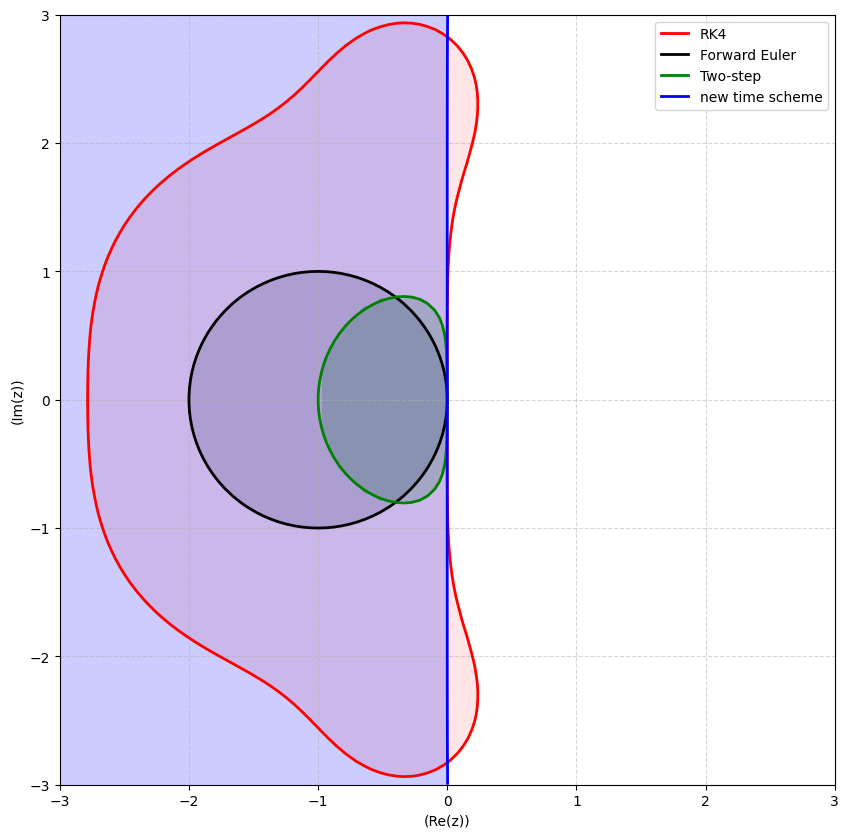

In [3]:



z = symbols("z")
#lamb = symbols("lamb")
t = symbols("t")
w = symbols("w")
unp_list = symbols("un0 un1 un2 un3 un4 un5 un6 un7")
ump_list = symbols("um0 um1 um2 um3 um4 um5 um6 um7")


sqrt5 = symbols("sqrt5")


# 定义阶数
N = 3

if   N == 1:
    x_lgl = [-1.    ,1.       ]
elif N == 2:
    x_lgl = [-1.    ,0              ,1.       ]
elif N == 3:
    x_lgl = [-1.    ,-1/sqrt5     ,1/sqrt5         ,1.       ]
    #w_lgl = [0.16666667, 0.83333333, 0.83333333 ,0.16666667]
elif N == 4:
    x_lgl = [-1.    ,-sqrt(3)/sqrt(7)    ,0.                ,sqrt(3)/sqrt(7)         ,1.        ]
elif N == 5:
    x_lgl = [-1.    ,-0.76505532    ,-0.28523152       , 0.28523152        ,0.76505532         ,1.        ]


x_lgl = Matrix(x_lgl)

# 获取基函数
Basis_funcs = []
for i in range(N+1):
    y_lgl = [0 for xx in x_lgl]
    y_lgl[i] = 1
    points_lgl = list(zip(x_lgl, y_lgl))
    Basis_funcs.append(interpolate(points_lgl,t))
print("基函数：",end="")
print(Basis_funcs)

# 定义单元自由度
Un =unp_list[:N+1]
Um =ump_list[:N+1]
print("单元自由度Un：",end="")
print(Un)


# 定义单元解
Uh  = interpolate(list(zip(x_lgl, Un)),t)
Uhm  = interpolate(list(zip([xx-2 for xx in x_lgl], Um)),t)
print("单元近似解Uh：",end="")
print(Uh)


# 显式隐式调整

# explicit
F = Uhm
 # implicit
F = Uh


# 计算推进格式
exprs=[]
for Li in Basis_funcs:
    expri = Un[N] * Li.subs(t,1) - Um[N] * Li.subs(t,-1)  - integrate((w*Uh+(1-w)*Uhm)*diff(Li,t),(t,-1,1))  - z/2*integrate(F*Li,(t,-1,1))
    #expri = Un[N] * Li.subs(t,1) - Um[N] * Li.subs(t,-1)  - integrate((w*Uh+(1-w)*Uhm)*diff(Li,t),(t,-1,1))  - z/2*trapezoidal_integration(F*Li,t,-1,1)
    exprs.append(expri)

print(exprs)
# 计算放大矩阵G
A = solve(exprs,Un)
G = MutableDenseMatrix.zeros(N+1,N+1)
for i in range(N+1):
    for j in range(N+1):
        G[i,j] = A[Un[i]]
        for k in range(N+1):
            if j==k :
                G[i,j] = G[i,j].subs(Um[k],1)
            else :
                G[i,j] = G[i,j].subs(Um[k],0)

print("放大矩阵：")
print(G)
print("检查G是否满足 U^n = G * U^{n-1} : ",end="")
print(simplify(Matrix(list(A.values())) - G*Matrix(Um)))


ww = 1
G = G.subs(w,ww)
print(G.det())
print(G.eigenvals())
G = G.subs(sqrt5,sqrt(5))

# print(simplify(G.subs(w,ww)))
# print(G.det())

# # 特征值
# eigenvalues = expand(G).eigenvals()
# print(eigenvalues)
# # for eigenval, multiplicity in eigenvalues.items():
# #     print(f"特征值: {simplify(eigenval)}, 重数: {multiplicity}")
# eigenval_list= list(eigenvalues.keys())


# #收敛性分析
# print(series(eigenval_list[0],z,0,10))
# print(series(exp(z),z,0,10))
# print(series(exp(z)-eigenval_list[0],z,0,10))


# # 谱半径
# expr_max = Abs(eigenval_list[0])
# for eigenval in eigenval_list:
#     expr_max = Max(expr_max,Abs(eigenval))

#eigenvalues_max = lambdify([z],expr_max)

#plot_stab_region(eigenvalues_max)



# 当N比较大，使用数值解法求特征值
def gen_eigenvalues_max(G):
    G_num = lambdify((z), G, 'numpy')
    def eigenvalues_max(zz):
        eigenvalues_np = np.linalg.eigvals(G_num(zz))
        return np.max(np.abs(eigenvalues_np))
    return eigenvalues_max

num_eigenvalues_max = gen_eigenvalues_max(G)

# 稳定域图像
plot_stab_region(np.vectorize(num_eigenvalues_max))




